In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
churns=pd.read_csv("C:/Users/yasir/OneDrive/Documents/churn.csv")

In [3]:
churns.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churns.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
churns.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


C:\Users\yasir\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


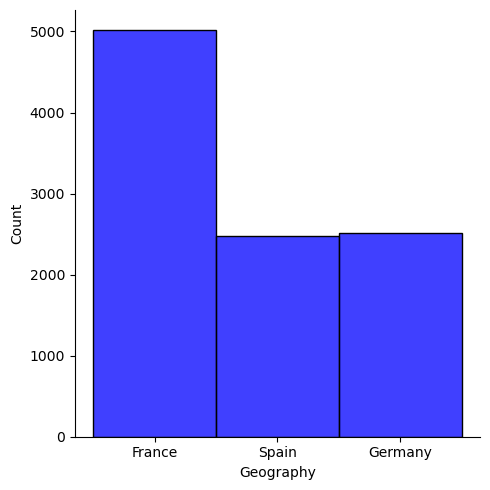

In [6]:
sns.displot(churns.Geography,color="blue")

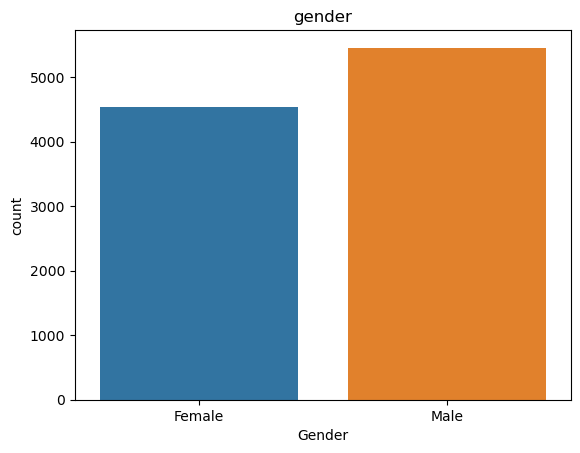

In [7]:
sns.countplot(x="Gender",data=churns)
plt.title("gender")
plt.show()

In [8]:
churns.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)

In [9]:
churns = pd.get_dummies(churns)

In [10]:
x = churns.drop("Exited", axis=1).to_numpy().astype('float64')
y = churns["Exited"].to_numpy().astype('float64')

In [11]:
x.shape,y.shape

((10000, 13), (10000,))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=454)

In [13]:
x_train,x_test,y_train,y_test

(array([[508.,  54.,  10., ...,   1.,   0.,   1.],
        [694.,  37.,   8., ...,   0.,   1.,   0.],
        [670.,  40.,   3., ...,   0.,   1.,   0.],
        ...,
        [850.,  40.,   6., ...,   0.,   0.,   1.],
        [587.,  44.,   5., ...,   0.,   1.,   0.],
        [630.,  42.,   6., ...,   0.,   0.,   1.]]),
 array([[558.,  47.,   9., ...,   0.,   1.,   0.],
        [501.,  40.,   4., ...,   0.,   0.,   1.],
        [699.,  44.,   8., ...,   0.,   0.,   1.],
        ...,
        [597.,  43.,   7., ...,   0.,   1.,   0.],
        [684.,  46.,   0., ...,   0.,   0.,   1.],
        [742.,  24.,   8., ...,   1.,   0.,   1.]]),
 array([0., 1., 1., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [14]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((7000, 13), (3000, 13), (3000,), (7000,))

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
new=le.fit_transform(y)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\yasir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred1=lr.predict(x_test)

In [20]:
lr.score(x_test,y_test)

0.7943333333333333

In [21]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred2=dt.predict(x_test)

In [23]:
dt.score(x_test,y_test)

0.791

In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_pred3=rf.predict(x_test)

In [26]:
rf.score(x_test,y_test)

0.8643333333333333

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_pred1,y_test))
print(confusion_matrix(y_pred2,y_test))
print(confusion_matrix(y_pred3,y_test))

[[2337  563]
 [  54   46]]
[[2071  307]
 [ 320  302]]
[[2313  329]
 [  78  280]]


In [29]:
finaldata=pd.DataFrame({'models':['lr','dt','rf'],
             'acc':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100,
                   ]})

In [30]:
finaldata

,models,acc
0,lr,79.433333
1,dt,79.100000
2,rf,86.433333


C:\Users\yasir\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


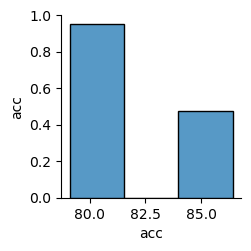

In [44]:
sns.pairplot(finaldata)

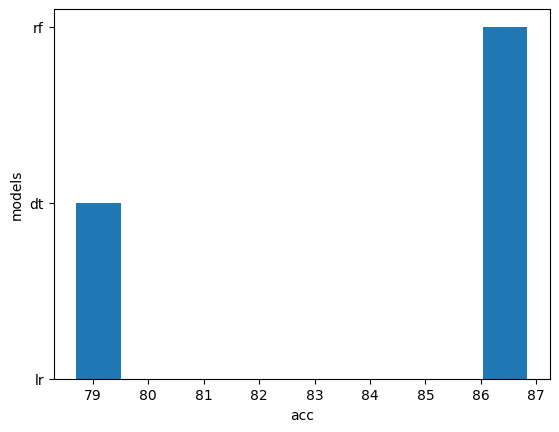

In [45]:
plt.xlabel("acc")
plt.ylabel("models")
plt.bar(finaldata.acc,finaldata.models)
plt.show()

In [ ]:
#thankyou....